In [1]:
from Environments.BaseMarket import TestEnv
from Environments.SimpleMarket import SimpleMarket

from ray.rllib.agents.dqn.dqn import DQNTrainer, DEFAULT_CONFIG
import numpy as np
import matplotlib.pyplot as plt
import ray
import gym
from ray.tune.registry import register_env
import os
import gc
import torch
import pandas as pd
gc.collect()

1111

In [2]:
try:
    ray.init(num_gpus = 0, num_cpus = 4)
except:
    ray.shutdown()
    ray.init(num_gpus = 0, num_cpus = 4)

2021-06-15 00:25:04,062	INFO services.py:1272 -- View the Ray dashboard at http://127.0.0.1:8266


In [3]:
trainer_config = DEFAULT_CONFIG.copy()

In [4]:
trainer_config['model']

{'_use_default_native_models': False,
 'fcnet_hiddens': [256, 256],
 'fcnet_activation': 'tanh',
 'conv_filters': None,
 'conv_activation': 'relu',
 'post_fcnet_hiddens': [],
 'post_fcnet_activation': 'relu',
 'free_log_std': False,
 'no_final_linear': False,
 'vf_share_layers': True,
 'use_lstm': False,
 'max_seq_len': 20,
 'lstm_cell_size': 256,
 'lstm_use_prev_action': False,
 'lstm_use_prev_reward': False,
 '_time_major': False,
 'use_attention': False,
 'attention_num_transformer_units': 1,
 'attention_dim': 64,
 'attention_num_heads': 1,
 'attention_head_dim': 32,
 'attention_memory_inference': 50,
 'attention_memory_training': 50,
 'attention_position_wise_mlp_dim': 32,
 'attention_init_gru_gate_bias': 2.0,
 'attention_use_n_prev_actions': 0,
 'attention_use_n_prev_rewards': 0,
 'num_framestacks': 'auto',
 'dim': 84,
 'grayscale': False,
 'zero_mean': True,
 'custom_model': None,
 'custom_model_config': {},
 'custom_action_dist': None,
 'custom_preprocessor': None,
 'lstm_use_pr

In [5]:
trainer_config['model']['use_lstm'] = False
trainer_config['model']['lstm_cell_size'] = 512
trainer_config['num_gpus'] = 0
trainer_config['num_gpus_per_worker'] = 0
trainer_config['num_envs_per_worker'] = 1
trainer_config['gamma'] = 0
trainer_config['framework'] = 'torch'
trainer_config['num_workers'] = 1
trainer_config['rollout_fragment_length'] = 1000
trainer_config['model']['framestack'] = False
trainer_config['model']['fcnet_hiddens'] = [1024, 1024]
conf = {'curiosity_reward':0,
        'continuous':False,
        'data_path':"Data/ray_data/",
        'starting_money': 1000,
        'starting_stocks': 0,
        'episode_length': 100,
        'commission': 0.0025
        }
trainer_config['env_config'] = conf

In [6]:
def create_env(env_config):
    return TestEnv(SimpleMarket(env_config))

In [7]:
register_env('SimpleMarket', create_env)

In [8]:
trainer = DQNTrainer(trainer_config, env = 'SimpleMarket')

2021-06-15 00:25:13,263	INFO trainer.py:696 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(pid=17164) Stream name: -ad54363e-bba1-443e-b318-f256ddf5cf08
(pid=17164) Reset External env wrapper
(pid=17164) 63
(pid=17164) Generator created
(pid=17164) 64


2021-06-15 00:25:15,994	WARNING util.py:53 -- Install gputil for GPU system monitoring.


In [9]:
best_reward = -np.inf
trainer.save()
hall_of_fame = [0]
last_checkpoint = 0

In [10]:
%%time
for i in range(100):
    print("Training iteration {}...".format(i))
    results = trainer.train()
    this_reward = results['episode_reward_max']
    if this_reward > best_reward:
        best_reward = this_reward
        trainer.save()
        os.remove(path)
        last_checkpoint = i + 1
        hall_of_fame.append(i+1)
        print('New best reward')
        print(best_reward)
        
    if i % 10 == 0:
        print('Best Reward So Far')
        print(best_reward)      

Training iteration 0...
(pid=17164) Get episode end
(pid=17164) Reset SimpleMarket before return: [ 1.42710000e+02  5.25409568e+01  1.43230000e+02  1.42630000e+02
(pid=17164)   1.43230000e+02  1.42710000e+02  9.31700536e+01  3.49317837e+00
(pid=17164)   1.78015152e-01  4.05592144e+01  3.33333333e+01 -9.97158502e+03
(pid=17164)   1.05881338e+02  2.63938523e+01 -4.79854785e+01  7.54288003e+01
(pid=17164)   2.63938523e+01 -2.26410956e+01  9.01400665e+01  2.80094052e+01
(pid=17164)  -3.41212560e+01  2.63938523e+01  1.90592350e+01  4.18055077e+01
(pid=17164)   3.48334758e+01  3.84445254e+01  4.16597899e+01  2.20094639e+01
(pid=17164)   3.22781183e+01  4.60000000e-01  3.23374341e-01  5.22185270e+01
(pid=17164)   4.16747071e-01 -6.06423698e+01  5.42437938e-02 -7.20670391e+01
(pid=17164)   5.68440940e+01  5.00000000e+01 -9.97363093e+03  5.83776472e+01
(pid=17164)  -1.34754181e+01 -8.21709640e+01  6.86572897e+01 -1.34754181e+01
(pid=17164)  -9.56081260e+01  4.40466501e+01 -1.24962044e+01 -6.903

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\nikola staykov/ray_results\\DQN_SimpleMarket_2021-06-15_00-25-1399yjzg8h\\checkpoint_0/checkpoint-0'

In [11]:
path = trainer.logdir + 'checkpoint_{0}/checkpoint-{0}'.format(hall_of_fame[-1])

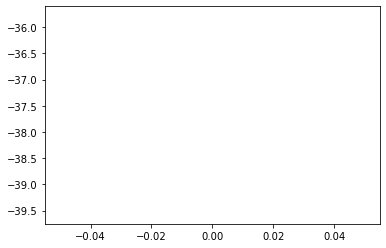

In [12]:
training = pd.read_csv(trainer.logdir + 'progress.csv')
plt.plot(training['episode_reward_mean'])

In [13]:
env = LimitMarket(conf)
obs = env.reset()

done = False
cumulative_reward = 0
prices = []
assets = []
actions = []
states = [obs]
rewards = []
hidden = [torch.zeros(512),torch.zeros(512)]
infos = []
while not done:
    action, hidden, info = trainer.compute_action(obs, hidden)
    obs, reward, done, results = env.step(action)
    cumulative_reward += reward
    rewards.append(reward)
    actions.append(action)
    assets.append(results['assets'])
    prices.append(results['current_price'])
    states.append(obs)
    infos.append(info)
    if i % 100 == 0:
        print('Step: {}/{}'.format(i, 200))
print("Cumulative reward you've received is: {}. Congratulations!".format(cumulative_reward))
print("Asset_Gain {}".format(assets[-1] -assets[0]))

NameError: name 'LimitMarket' is not defined

In [ ]:
pure_actions = []
for action in actions:
    pure_actions.append(action[0])
    
actions = pure_actions

In [ ]:
buy10 = np.ma.masked_where(np.array(actions) != 0, prices)
buy20 = np.ma.masked_where(np.array(actions) != 1, prices)
buy50 = np.ma.masked_where(np.array(actions) != 2, prices)
sell10 = np.ma.masked_where(np.array(actions) != 3, prices)
sell20 = np.ma.masked_where(np.array(actions) != 4, prices)
sell50 = np.ma.masked_where(np.array(actions) != 5, prices)
hold = np.ma.masked_where(np.array(actions) != 6, prices)

# plt.plot(prices, marker = '', markersize = 0.5, markevery = np.where(np.array(actions) == 6, True, False))
# plt.figure(figsize = (20, 15))
# plt.plot(buy10, c = 'turquoise', linewidth = 0.6)
# plt.plot(buy20, c = 'lime', linewidth = 0.6)
# plt.plot(buy50, c = 'green', linewidth = 0.6)
# plt.plot(hold, c = 'blue', linewidth = 0.6)
graph_prices = prices[::10][:500]
graph_actions = actions[::10][:500]
colors = ['r', 'r', 'r', 'g', 'g', 'g', 'b']
fig = plt.figure(figsize = (10, 6))
plt.scatter(range(len(graph_prices)), graph_prices, s=1, color = np.array(colors)[graph_actions])

In [ ]:
plt.plot(assets)

In [ ]:
plt.plot(prices)

In [ ]:
obs = env.test()

done = False
cumulative_reward = 0
prices = []
assets = []
actions = []
states = [obs]
rewards = []
hidden = [torch.zeros(512),torch.zeros(512)]
infos = []
market_beaters = []
while not done:
    action, hidden, info = trainer.compute_action(obs, hidden)
    obs, reward, done, results = env.step(action)
    cumulative_reward += reward
    rewards.append(reward)
    actions.append(action)
    assets.append(results['assets'])
    prices.append(results['current_price'])
    states.append(obs)
    infos.append(info)
    market_beaters.append(results['market_beater'])
print("Cumulative reward you've received is: {}. Congratulations!".format(cumulative_reward))
print("Asset_Gain {}".format(assets[-1] -assets[0]))

In [ ]:
plt.plot(market_beaters)

In [ ]:
pure_actions = []
for action in actions:
    print(action)

In [ ]:
buy10 = np.ma.masked_where(np.array(actions) == 0, prices)
buy20 = np.ma.masked_where(np.array(actions) == 1, prices)
buy50 = np.ma.masked_where(np.array(actions) == 2, prices)
hold = np.ma.masked_where(np.array(actions) == 3, prices)

plt.plot(buy10, c = 'turquoise')
plt.plot(buy20, c = 'lime')
plt.plot(buy50, c = 'green')
plt.plot(hold, c = 'blue')

In [ ]:
plt.plot(assets)

In [ ]:
plt.plot(prices)

In [ ]:
market_beaters[-1]

In [ ]:
from sklearn import preprocessing

In [ ]:
prices_norm = preprocessing.normalize(np.array(prices).reshape(-1,1))
assets_norm = preprocessing.normalize(np.array(assets).reshape(-1,1))

In [ ]:
assets_norm-prices_norm

(pid=17164) Exception in thread Thread-1:
(pid=17164) Traceback (most recent call last):
(pid=17164)   File "D:\Program_files\Anaconda\envs\ray\lib\threading.py", line 932, in _bootstrap_inner
(pid=17164)     self.run()
(pid=17164)   File "D:\Projects\hatchery\perper\samples\PythonNotebook\RL_Trader\Environments\BaseMarket.py", line 32, in run
(pid=17164)     action = self.get_action(episode_id, obs)
(pid=17164)   File "D:\Program_files\Anaconda\envs\ray\lib\site-packages\ray\rllib\env\external_env.py", line 128, in get_action
(pid=17164)     return episode.wait_for_action(observation)
(pid=17164)   File "D:\Program_files\Anaconda\envs\ray\lib\site-packages\ray\rllib\env\external_env.py", line 241, in wait_for_action
(pid=17164)     return self.action_queue.get(True, timeout=60.0)
(pid=17164)   File "D:\Program_files\Anaconda\envs\ray\lib\queue.py", line 178, in get
(pid=17164)     raise Empty
(pid=17164) _queue.Empty
